In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

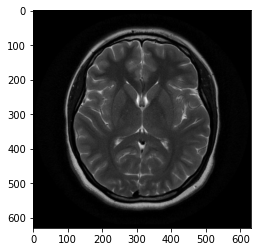

In [58]:
datadir = r"D:\Python projects\Machine Learning\Machine_learning Project 1\brain_tumor_dataset"
CATEGORIES = ["not_tumor","yes_tumor"] #0 , 1


for category in CATEGORIES:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [59]:
print(img_array.shape)

(630, 630)


<function matplotlib.pyplot.show(close=None, block=None)>

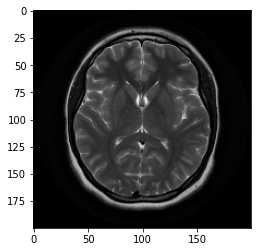

In [60]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show

In [61]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(datadir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()        

In [62]:
print(len(training_data))

253


In [63]:
import random

random.shuffle(training_data)

In [64]:
training_data[0]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 1]

In [65]:
X = []
y = []

In [66]:
import numpy as np
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [67]:
y[:5]

array([1, 1, 0, 0, 1])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [70]:
X_train.shape

(202, 200, 200, 1)

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten

In [82]:
cnn = models.Sequential([
   
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(200,200,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [83]:
cnn.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics =['accuracy'])

In [84]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 16)      160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 23, 23, 64)      

In [85]:
cnn.fit(X_train,y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 3s 330ms/step - loss: 74.8873 - accuracy: 0.5990
Epoch 2/20
7/7 [==============================] - 2s 327ms/step - loss: 2.5478 - accuracy: 0.7673
Epoch 3/20
7/7 [==============================] - 2s 328ms/step - loss: 0.6187 - accuracy: 0.8069
Epoch 4/20
7/7 [==============================] - 2s 330ms/step - loss: 0.3771 - accuracy: 0.8416
Epoch 5/20
7/7 [==============================] - 2s 327ms/step - loss: 0.2296 - accuracy: 0.9059
Epoch 6/20
7/7 [==============================] - 2s 334ms/step - loss: 0.1644 - accuracy: 0.9257
Epoch 7/20
7/7 [==============================] - 2s 339ms/step - loss: 0.0955 - accuracy: 0.9703
Epoch 8/20
7/7 [==============================] - 2s 341ms/step - loss: 0.0570 - accuracy: 0.9851
Epoch 9/20
7/7 [==============================] - 2s 339ms/step - loss: 0.0312 - accuracy: 0.9950
Epoch 10/20
7/7 [==============================] - 2s 335ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 11/20
7/7 [=

In [87]:
cnn.evaluate(X_test,y_test)

2/2 [==============================] - 0s 68ms/step - loss: 1.7700 - accuracy: 0.8235


[1.7700278759002686, 0.8235294222831726]

In [95]:
y_predicted = cnn.predict(X_test)
y_predicted[:5]

array([[9.5553634e-12],
       [9.9981976e-01],
       [9.9998009e-01],
       [9.7029948e-01],
       [9.6705969e-07]], dtype=float32)

In [96]:
predicted = []
for i in y_predicted:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [97]:
predicted[:5]

[0, 1, 1, 1, 0]

In [98]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted)

In [99]:
import seaborn as sn

Text(51.0, 0.5, 'Truth')

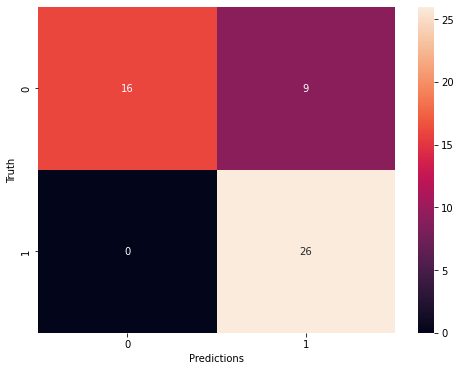

In [100]:
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")